<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/01_curso_tf_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ol type='1'>
  <li> Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it. </li>


<li>Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform? </li>


<li>Try and improve the results we got on the insurance dataset, some things you might want to try include:</li>
<ul type='circle'>
  <li>Building a larger model (how does one with 4 dense layers go?).</li>
  <li> Increasing the number of units in each layer. </li>
  <li> Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x? </li>
  <li> What happens if you train for longer (say 300 epochs instead of 200)? </li>
</ul>

<li> Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it. </li
</ul>

##1 and 2

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

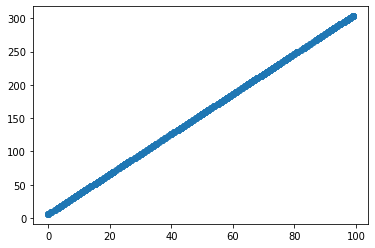

In [22]:
 X = np.random.randint(low=0, high=100, size=500)
 y = 3.0 * X + 10.0*np.random.random()
fig, ax = plt.subplots()
ax.scatter(X,y)
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state=42)

In [149]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

model1.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

historial1 = model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,validation_data=(X_test, y_test), verbose=0)
model1.evaluate(X_train, y_train)


5/5 [==============================] - 0s 3ms/step - loss: 85.6828 - mae: 85.6828


[85.6827621459961, 85.6827621459961]

In [150]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

model2.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

historial2 = model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,validation_data=(X_test, y_test), verbose=0)
model2.evaluate(X_train, y_train)


5/5 [==============================] - 0s 3ms/step - loss: 47.2963 - mae: 47.2963


[47.29627990722656, 47.29627990722656]

In [151]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1),
    ])

model3.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

historial3 = model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, validation_data=(X_test, y_test),verbose=0)
model3.evaluate(X_train, y_train)

5/5 [==============================] - 0s 3ms/step - loss: 9.9550 - mae: 9.9550


[9.954980850219727, 9.954980850219727]

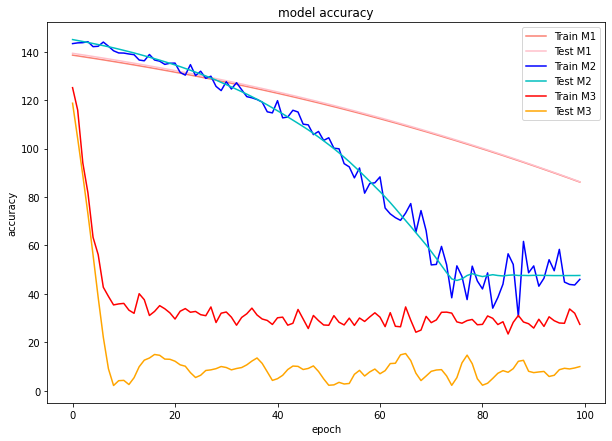

In [156]:
plt.figure(figsize=(10,7))

# pd.DataFrame(historial1.history).plot(title='model1')
# pd.DataFrame(historial2.history).plot(title='model2')
# pd.DataFrame(historial3.history).plot(title='model3')
# plt.ylabel('loss')
# plt.xlabel('epochs')


plt.plot(historial1.history['loss'], c='salmon', label = 'Train M1')
plt.plot(historial1.history['val_loss'], c='pink', label = 'Test M1')

plt.plot(historial2.history['loss'], c='b', label = 'Train M2')
plt.plot(historial2.history['val_loss'], c='c', label = 'Test M2')

plt.plot(historial3.history['loss'], c='red', label = 'Train M3')
plt.plot(historial3.history['val_loss'], c='orange', label = 'Test M3')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [153]:
tf.random.set_seed(42)
# test1 = model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
y_preds1 = model1.predict(X_test)
y_preds2 = model2.predict(X_test)
y_preds3 = model3.predict(X_test)

def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_pred)

mse(y_test, tf.squeeze(y_preds1))

11/11 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=9746.969>

(150,)


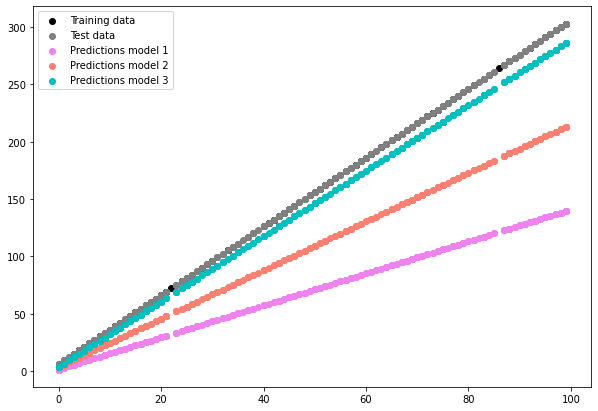

In [155]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions1 = y_preds1,
                     predictions2 = y_preds2,
                     predictions3 = y_preds3):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='k', label = 'Training data')
  plt.scatter(test_data, test_labels, c='gray', label = 'Test data')
  plt.scatter(test_data, predictions1, c='violet', label = 'Predictions model 1')
  plt.scatter(test_data, predictions2, c='salmon', label = 'Predictions model 2')
  plt.scatter(test_data, predictions3, c='c', label = 'Predictions model 3')
  plt.legend()
print(y_train.shape)
plot_predictions()

#3)


In [159]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_ohe = pd.get_dummies(insurance)
X = insurance_ohe.drop('charges', axis=1)
y = insurance_ohe['charges']

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [200]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_new = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_new.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
historial_new = model_new.fit(X3_train, y3_train, epochs=200, validation_data=(X3_test, y3_test), verbose=0)
model_new.evaluate(X3_train, y3_train)


34/34 [==============================] - 0s 2ms/step - loss: 3663.1772 - mae: 3663.1772


[3663.17724609375, 3663.17724609375]

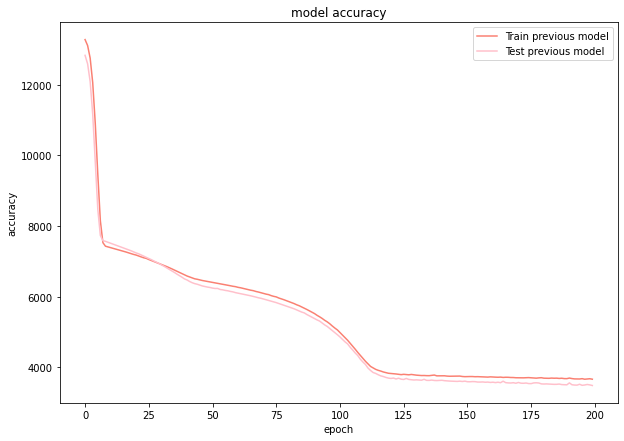

In [201]:
#plot primer modelo de insurance.
plt.figure(figsize=(10,7))

plt.plot(historial_new.history['loss'], c='salmon', label = 'Train previous model')
plt.plot(historial_new.history['val_loss'], c='pink', label = 'Test previous model')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [202]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_new2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_new2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
historial_new2 = model_new2.fit(X3_train, y3_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
model_new2.evaluate(X3_train, y3_train)


34/34 [==============================] - 0s 2ms/step - loss: 3762.8625 - mae: 3762.8625


[3762.862548828125, 3762.862548828125]

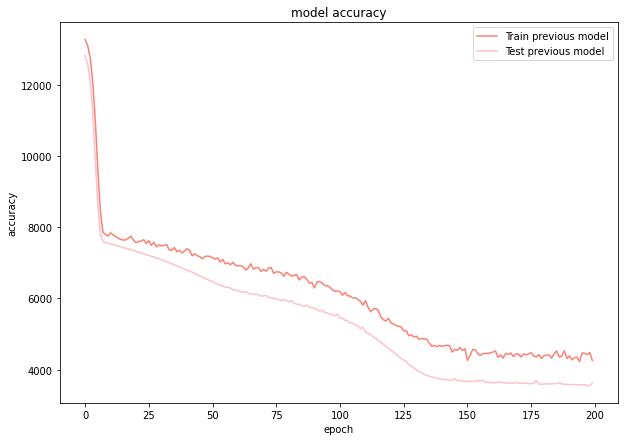

In [203]:
#plot primer modelo de insurance.
plt.figure(figsize=(10,7))

plt.plot(historial_new2.history['loss'], c='salmon', label = 'Train previous model')
plt.plot(historial_new2.history['val_loss'], c='pink', label = 'Test previous model')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [204]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_new3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(100), # 10 units
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(10),
  # tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_new3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
historial_new3 = model_new3.fit(X3_train, y3_train, epochs=200, validation_data=(X3_test, y3_test), verbose=0)
model_new3.evaluate(X3_train, y3_train)


34/34 [==============================] - 0s 2ms/step - loss: 3514.2913 - mae: 3514.2913


[3514.291259765625, 3514.291259765625]

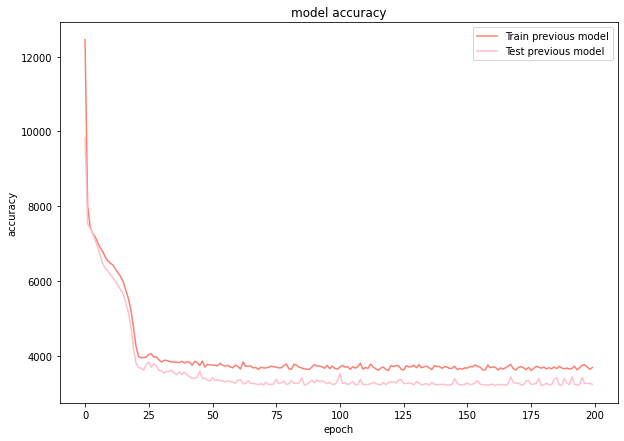

In [205]:
#plot primer modelo de insurance.
plt.figure(figsize=(10,7))

plt.plot(historial_new3.history['loss'], c='salmon', label = 'Train previous model')
plt.plot(historial_new3.history['val_loss'], c='pink', label = 'Test previous model')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [224]:
tf.random.set_seed(42)
# test1 = model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
y_pred_new = model_new.predict(X_test)
y_pred_new2 = model_new2.predict(X_test)
y_pred_new3  = model_new3.predict(X_test)

print(mae(y_test, tf.squeeze(y_pred_new)), mae(y_test, tf.squeeze(y_pred_new2)), mae(y_test, tf.squeeze(y_pred_new3)))
print(mse(y_test, tf.squeeze(y_pred_new)), mse(y_test, tf.squeeze(y_pred_new2)), mse(y_test, tf.squeeze(y_pred_new3)))


9/9 [==============================] - 0s 6ms/step
tf.Tensor(3488.7856, shape=(), dtype=float32) tf.Tensor(3626.4414, shape=(), dtype=float32) tf.Tensor(3239.5066, shape=(), dtype=float32)
tf.Tensor(42432424.0, shape=(), dtype=float32) tf.Tensor(35773052.0, shape=(), dtype=float32) tf.Tensor(38093748.0, shape=(), dtype=float32)


4)